In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:\ML MODEL DEPLOY\Dataset.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df=df.drop(columns=['isFlaggedFraud'])
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [8]:
df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


**Data Visualization**

<Axes: >

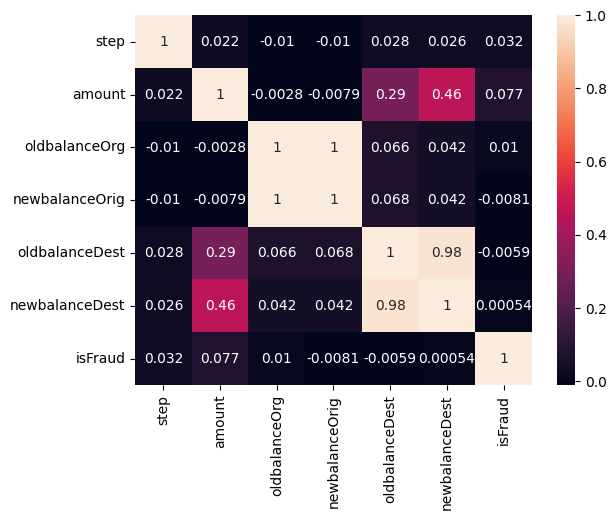

In [11]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

**Univariate Analysis**

<Axes: xlabel='step', ylabel='Density'>

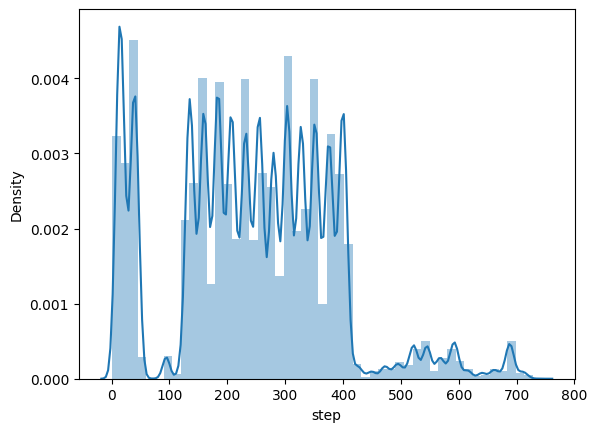

In [12]:
sns.distplot(df['step'])

<Axes: xlabel='step', ylabel='Count'>

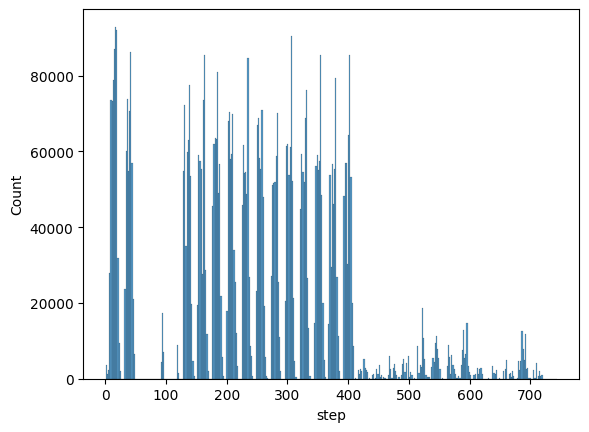

In [13]:
sns.histplot(data=df,x='step')


<Axes: xlabel='step'>

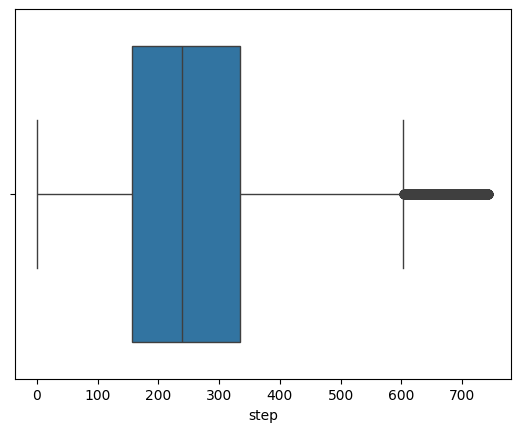

In [14]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

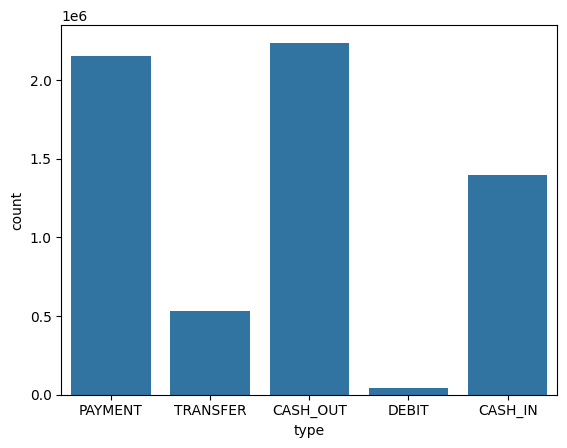

In [17]:
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

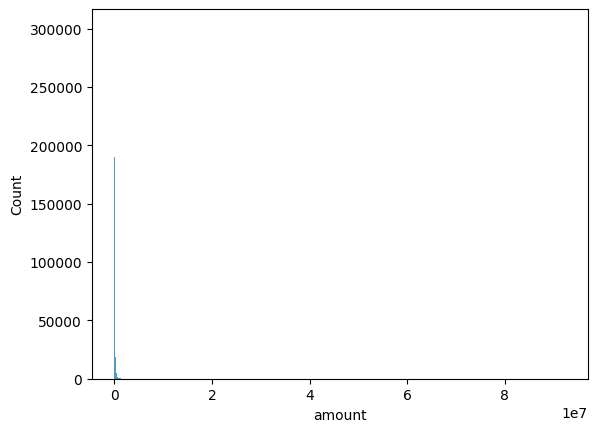

In [16]:
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

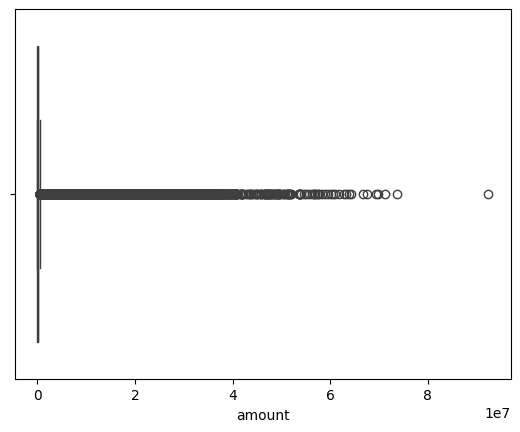

In [18]:
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

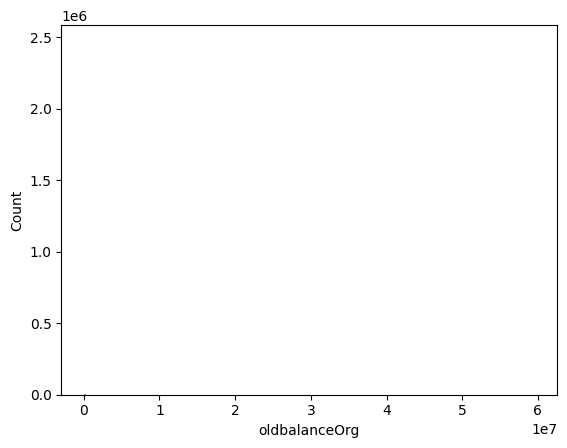

In [ ]:
sns.histplot(data=df,x='oldbalanceOrg')

In [19]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

<Axes: xlabel='oldbalanceDest'>

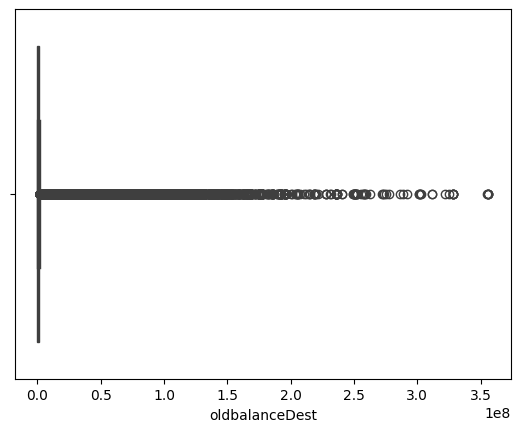

In [20]:
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

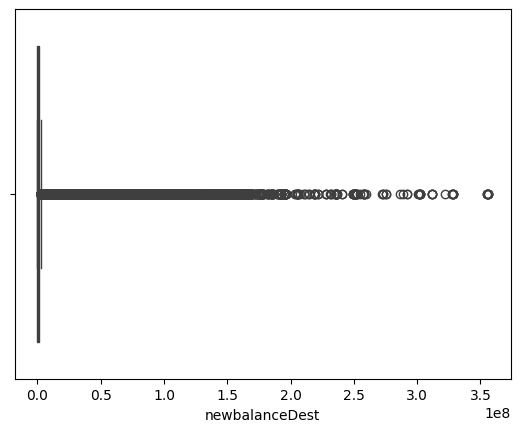

In [21]:
sns.boxplot(data=df,x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

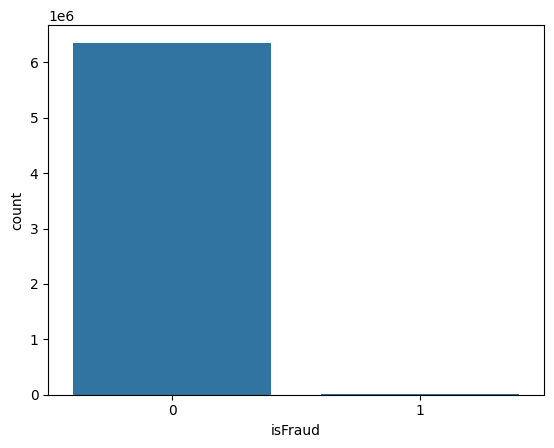

In [22]:
sns.countplot(data=df,x='isFraud')

In [23]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [24]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [25]:
df.newbalanceOrig.fillna(df.newbalanceOrig.median(),inplace=True)
df.oldbalanceDest.fillna(df.oldbalanceDest.median(),inplace=True)
df.newbalanceDest.fillna(df.newbalanceDest.median(),inplace=True)
df.isFraud.fillna(df.isFraud.median(),inplace=True)

In [26]:
df.loc[df['isFraud']==0,'isFraud']='is not Fraud'
df.loc[df['isFraud']==1,'isFraud']='is Fraud'


In [27]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,is not Fraud


<Axes: xlabel='type', ylabel='count'>

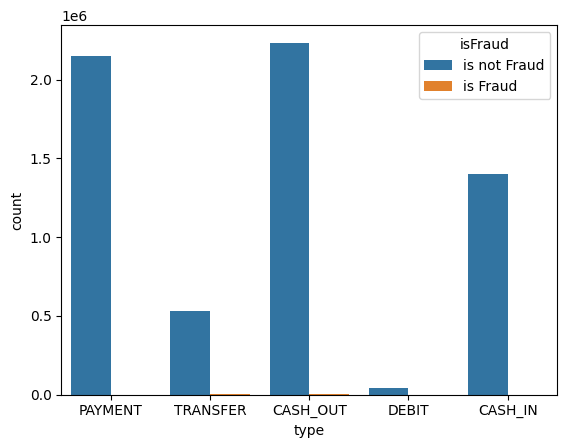

In [28]:
sns.countplot(data=df,x='type',hue='isFraud')

**Data Preprocessing**

In [29]:
df.shape

(6362620, 10)

In [30]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [31]:
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=10000000.0, count=3207)
179861.90354913071


In [32]:
q1 = df['amount'].quantile(0.25)
q3 = df['amount'].quantile(0.75)
IQR = q3-q1
whisker_width = 1.5
lower_whisker = q1 -(whisker_width*IQR)
upper_whisker = q3 + (whisker_width*IQR)
df['amount']=np.where(df['amount']>upper_whisker,upper_whisker,np.where(df['amount']<lower_whisker,lower_whisker,df['amount']))

In [33]:
print('Q1 = ', q1)
print('Q3 = ', q3)
print('IQR = ', IQR)
print('Upper Bound = ', upper_whisker)
print('Lower Bound = ', lower_whisker)

Q1 =  13389.57
Q3 =  208721.4775
IQR =  195331.9075
Upper Bound =  501719.33875
Lower Bound =  -279608.29125


In [34]:
df['amount'] = np.log(df['amount'])

In [35]:
df.drop(['nameDest', 'nameOrig'], axis=1, inplace=True)

In [36]:
# Replacing infinite with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Dropping all the rows with nan values
df.dropna(inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [38]:
df['type']= label_encoder.fit_transform(df['type'])
df['type'].unique()

array([3, 4, 1, 2, 0])

In [39]:
x = df.drop(['isFraud'], axis=1)
y = df['isFraud']

**X & Y Split and Scaling Columns**

In [40]:
from sklearn.preprocessing import MinMaxScaler
x_scaled = pd.DataFrame(MinMaxScaler().fit_transform(x), columns=x.columns)

In [41]:
x_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,0.75,0.778262,0.002855,0.003233,0.000000,0.0
1,0.0,0.75,0.684441,0.000357,0.000391,0.000000,0.0
2,0.0,1.00,0.552912,0.000003,0.000000,0.000000,0.0
3,0.0,0.25,0.552912,0.000003,0.000000,0.000059,0.0
4,0.0,0.75,0.787875,0.000697,0.000603,0.000000,0.0


In [42]:
y.head()

0    is not Fraud
1    is not Fraud
2        is Fraud
3        is Fraud
4    is not Fraud
Name: isFraud, dtype: object

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, random_state=50, test_size=0.3)

In [44]:
X_train.shape

(4453822, 7)

In [45]:
X_test.shape

(1908782, 7)

In [46]:
y_train.shape

(4453822,)

In [47]:
y_test.shape

(1908782,)

**Model Building**

Logistic Regression

In [51]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
y=df['isFraud']
X=df.drop('isFraud',axis=1)
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,0.75,0.778262,0.002855,0.003233,0.000000,0.0
1,0.0,0.75,0.684441,0.000357,0.000391,0.000000,0.0
2,0.0,1.00,0.552912,0.000003,0.000000,0.000000,0.0
3,0.0,0.25,0.552912,0.000003,0.000000,0.000059,0.0
4,0.0,0.75,0.787875,0.000697,0.000603,0.000000,0.0


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [53]:
from imblearn.over_sampling import SMOTE
y_train.value_counts()
sm=SMOTE(random_state=42)
x_train_smote,y_train_smote=sm.fit_resample(X_train,y_train)
print("The values after scaling are")
y_train_smote.value_counts()

The values after scaling are


isFraud
is not Fraud    5083473
is Fraud        5083473
Name: count, dtype: int64

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve
lr=LogisticRegression()
lr.fit(x_train_smote,y_train_smote)
y_pred=lr.predict(X_test)
print("Training Score",accuracy_score(y_train_smote,lr.predict(x_train_smote)))
print("Testing Accuracy",accuracy_score(y_test,y_pred))

Training Score 0.8966881500108292
Testing Accuracy 0.9662284551689128


In [55]:
confusion_matrix(y_test,y_pred)

array([[   1312,     275],
       [  42700, 1228234]], dtype=int64)

In [56]:
pd.crosstab(y_test,y_pred)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1312,275
is not Fraud,42700,1228234


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    is Fraud       0.03      0.83      0.06      1587
is not Fraud       1.00      0.97      0.98   1270934

    accuracy                           0.97   1272521
   macro avg       0.51      0.90      0.52   1272521
weighted avg       1.00      0.97      0.98   1272521



Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_test_pred_2 = dtc.predict(X_test)

In [ ]:
accuracy_test_2 = accuracy_score(y_test, y_test_pred_2)
accuracy_test_2

0.9997053093819277

In [ ]:
pd.crosstab(y_test, y_test_pred_2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1403,184
is not Fraud,191,1270743


Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(criterion='entropy', max_depth=5,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=50)
rfc.fit(x_train_smote,y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=50)

In [59]:
y_pred=rfc.predict(X_test)
print("Training Score",accuracy_score(y_train_smote,rfc.predict(x_train_smote)))
print("Testing Accuracy",accuracy_score(y_test,y_pred))
print(X_test.shape)

Training Score 0.9386852256321613
Testing Accuracy 0.9837896584810781
(1272521, 7)


In [60]:
pd.crosstab(y_test,y_pred)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1439,148
is not Fraud,20480,1250454


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    is Fraud       0.07      0.91      0.12      1587
is not Fraud       1.00      0.98      0.99   1270934

    accuracy                           0.98   1272521
   macro avg       0.53      0.95      0.56   1272521
weighted avg       1.00      0.98      0.99   1272521



Extra tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train_smote,y_train_smote)
y_pred=etc.predict(X_test)
print("Training Score",accuracy_score(y_train_smote,etc.predict(x_train_smote)))
print("Testing Accuracy",accuracy_score(y_test,y_pred))

Training Score 1.0
Testing Accuracy 0.9994451957963758


In [ ]:
pd.crosstab(y_test,y_pred)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1426,161
is not Fraud,545,1270389


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    is Fraud       0.72      0.90      0.80      1587
is not Fraud       1.00      1.00      1.00   1270934

    accuracy                           1.00   1272521
   macro avg       0.86      0.95      0.90   1272521
weighted avg       1.00      1.00      1.00   1272521



In [ ]:
etc.predict([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

array(['is not Fraud'], dtype=object)

In [62]:
import pickle
pickle.dump(rfc, open('model.pkl', 'wb'))